##CSE-221710313011-D.Manasa

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.datasets import load_boston
boston=load_boston()

In [3]:
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df['MDV']=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


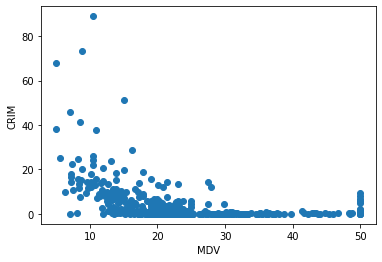

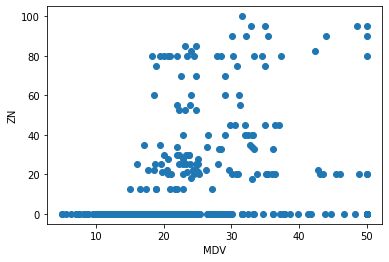

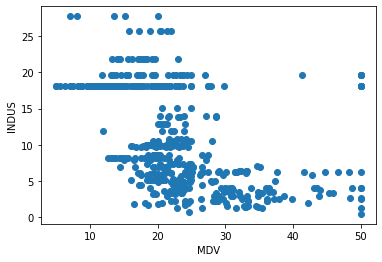

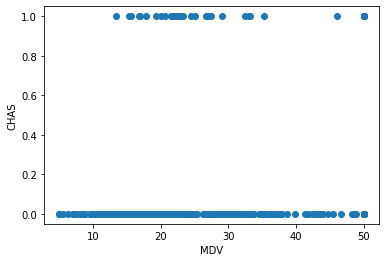

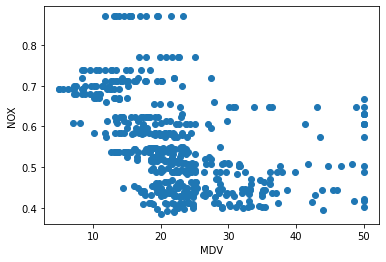

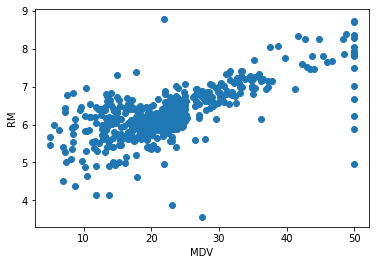

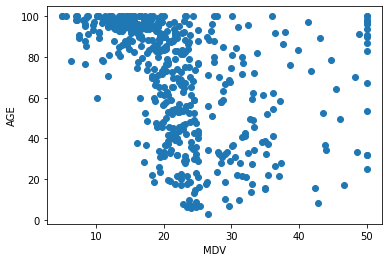

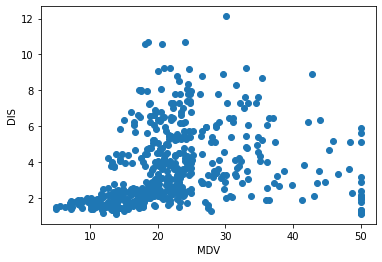

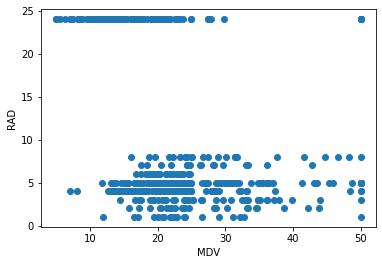

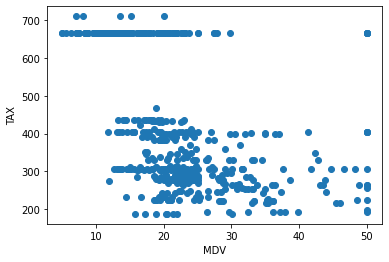

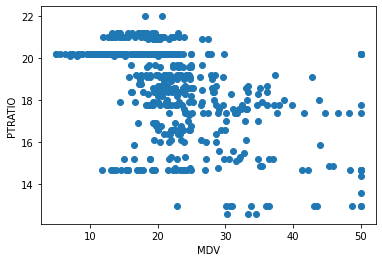

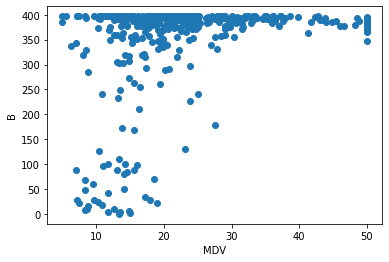

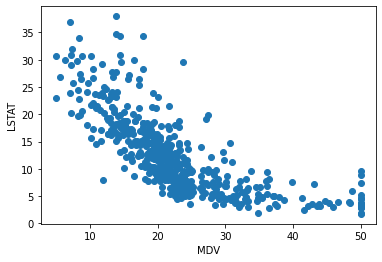

In [5]:
for i in boston.feature_names:
    plt.xlabel("MDV")
    plt.ylabel(i)
    plt.scatter(df['MDV'],df[i])
    plt.show()

###In 1st Graph i.e.,Relation Between MDV and CRIM
CRIM column doesn't show much effect on MDV column
In 2nd Graph i.e.,Relation Between MDV and ZN
ZN column doesn't show much effect on MDV column
In 3rd Graph i.e.,Relation Between MDV and INDUS
INDUS column doesn't show much effect on MDV column
In 4th Graph i.e.,Relation Between MDV and CHAS
CHAS column doesn't show much effect on MDV column
In 5th Graph i.e.,Relation Between MDV and NOX
NOX column doesn't show much effect on MDV column
In 6th Graph i.e.,Relation Between MDV and RM
RM column shows stong positive effect on MDV column
In 7th Graph i.e.,Relation Between MDV and Age
Age column shows slight negative much effect on MDV column
In 8th Graph i.e.,Relation Between MDV and DIS
DIS column shows slight positive much effect on MDV column
In 9th Graph i.e.,Relation Between MDV and RAD
RAD column doesn't show much effect on MDV column
In 10th Graph i.e.,Relation Between MDV and TAX
TAX column doesn't show much effect on MDV column
In 11th Graph i.e.,Relation Between MDV and PTRATIO
PTRATIO column doesn't show much effect on MDV column
In 12th Graph i.e.,Relation Between MDV and B
B column doesn't show much effect on MDV column
In 13th Graph i.e.,Relation Between MDV and LSTAT
LSTAT column shows negative effect on MDV column

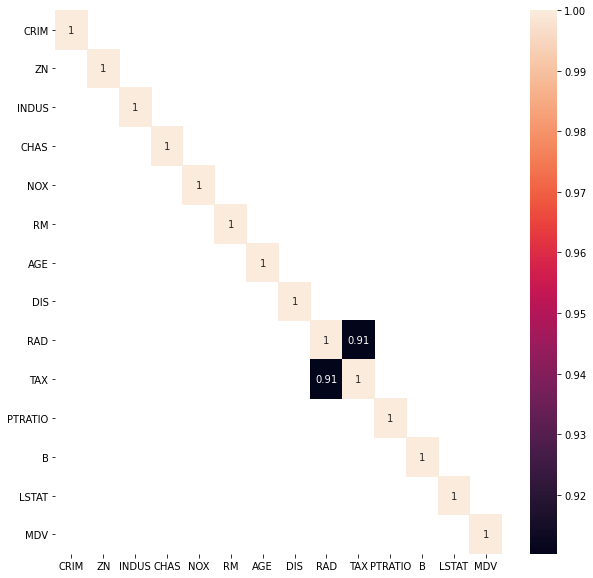

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr()[df.corr()>=0.9],annot=True)

###Only TAX and RAD columns have correlation of 0.91
Im droping RAD Column

In [7]:
x=df.drop(['MDV','RAD'],axis=1)
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48


In [8]:
y=df[['MDV']]
y

,MDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(404, 12)
(404, 1)
(102, 12)
(102, 1)


In [11]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred=lr.predict(x_test)

In [13]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import math

In [14]:
print("r2_score:",r2_score(y_test,y_pred))
print("adjusted_r2_score:",1- (1-r2_score(y_test, y_pred))*(len(x_test)-1)/
                                  (len(x_test)-x_test.shape[1]-1))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",math.sqrt(mean_squared_error(y_test,y_pred)))

r2_score: 0.7789181825925778
adjusted_r2_score: 0.7491093982230378
MAE: 3.137327796700342
MSE: 18.49563450781747
RMSE: 4.300655125421878
